# 시계열 데이터의 속성
* 종단면 시계열 데이터 - 시간의 흐름에 따라 한 변수에 대한 자료를 수집
* 횡단면 시계열 데이터 - 한 시점에서 여러 변수에 대한 자료 수집

# 시계열 데이터의 특징
* 계절성
* 추세성
* 반복성
* 순환성

# 시계열 데이터의 특징을 없애고 정상성 시계열로 만드는 방법
* decompose : 가법모형, 승법모형
* 정상성(stationarity) 테스트
    * KPSS(Kwiatkowski-Pillips-Schmidt-Shin Test)검정 : (HO 귀무가설) 정상성이 존재한다.
        * p-value가 0.05 0.05 이상인 경우 정상시계열
    * ADF(Augement Dickey-Fuller Test)검정 : (HO) 정상성이 존재하지 않는다
        * p-value가 0.05 이하인 경우 정상시계열

# 데이터 가정에 따른 시계열 모형
* 시계열 자료는 추세변동, 계정변동 등 다양한 변동요인이 다중적으로 중첩되어 있음.
    * 내포된 요인이 고정적 패턴을 보이는 경우(진폭 없음) : 요소분해법
    * 다양한 변동요인이 고정적 패턴을 보이지 않는 경우 : (지수)평활법

# 시계열 데이터 분석시 사용하는 확률모형(Stochastic Model) 분석 4단계
* 모형설정 : ACF, PACF 같은 지표와 Aoto.arima 같은 프로그램을 이용해서 시계열 자료에 적합한 모형 선택
* 모수추정 : 설정한 모형에 따라 모수를 측정하고 적합성 검토
* 분석결과 검정 : 모형적합도에 다른 잔차의 정상성 및 분석결과 검정 수행
* 예측(forecasting) : 시계열 자료와 분석모형을 토대로 미래 값을 예측

# 시계열 종류에 따른 분석 모형
## 안정적 시계열 or 정상 시계열(stationary)
* 자기회귀 모형(Autoregressive, AR)
* 이동 평균(Moving Average, MA)
* 자기회귀 이동평균 모형(Autoregressive Moving Average, ARMA)
## 불안정 시계열 or 비정상 시계열(non-stationary)
* 자기외귀 누적이동평균 모형(Autoregressive Integrated Moving Averate, ARIMA)

# 자기 상관 함수(Auto Correlation Function, ACF)
* 동일한 변수를 시점을 달리해서 관측했을 때 시점에 따라 다른 값 사이의 상호 연관관계를 나타내는 척도
* 연속적인 관측값 사이의 상호 연관관계
# 부분 자기 상관 함수(Partial ACF, PACF)
* 산정하고자 하는 연속적인 2개의 시계열 자료에서 상관계수 구함
* 산정하고자 하는 두 변수를 제외한 모든 변수의 영향을 제거한 상태에서 두 변수간에 존재하는 순수한 상관계수를 산정해서 정상성 검정

In [1]:
# !pip install plotly
!pip install chart-studio

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib   # 한국어 출력되게 
import os
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [3]:
summary = pd.read_csv("./data/Summary.csv")
summary

C:\Users\5-04\AppData\Local\Temp\ipykernel_14432\1294730033.py:1: DtypeWarning:

Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.



,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

In [5]:
operations = pd.read_csv('./data/operations.csv')
operations

C:\Users\5-04\AppData\Local\Temp\ipykernel_14432\571271464.py:1: DtypeWarning:

Columns (7,8,11,13,31,43,44) have mixed types. Specify dtype option on import or set low_memory=False.



,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,178738,2/16/1945,CBI,USA,10 AF,89 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35815.0
178277,178739,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35020.0
178278,178740,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35022.0
178279,178741,2/16/1945,PTO,NEW ZEALAND,RNZAF,NO. 22 SQUADRON RNZAF,F4U,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8000.0,4.0,NaN,NaN,NaN


In [6]:
operations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178281 entries, 0 to 178280
Data columns (total 46 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Mission ID                             178281 non-null  int64  
 1   Mission Date                           178281 non-null  object 
 2   Theater of Operations                  175123 non-null  object 
 3   Country                                126494 non-null  object 
 4   Air Force                              126444 non-null  object 
 5   Unit ID                                50913 non-null   object 
 6   Aircraft Series                        178165 non-null  object 
 7   Callsign                               21 non-null      object 
 8   Mission Type                           47186 non-null   object 
 9   Takeoff Base                           3383 non-null    object 
 10  Takeoff Location                       3338 non-null    

In [7]:
locations = pd.read_csv('./data/location.csv')
locations

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333
...,...,...,...,...,...,...,...,...
156,33109,EL AQUINA,TS,3651N,01015E,4,36.850000,10.016667
157,33121,EL DJEM,TS,3520N,01040E,9999,35.333333,10.066667
158,33003,SISI AHMED,TS,3712N,00950E,4,37.200000,9.083333
159,33307,ADANA,TU,3659N,03518E,20,36.983333,35.016667


In [8]:
locations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   LAT               161 non-null    object 
 4   LON               161 non-null    object 
 5   ELEV              161 non-null    int64  
 6   Latitude          161 non-null    float64
 7   Longitude         161 non-null    float64
dtypes: float64(2), int64(2), object(4)
memory usage: 10.2+ KB


In [9]:
aerial = operations.copy()
weather_station_location = locations.copy()
weather = summary.copy()

In [10]:
aerial.isna().sum()

Mission ID                                    0
Mission Date                                  0
Theater of Operations                      3158
Country                                   51787
Air Force                                 51837
Unit ID                                  127368
Aircraft Series                             116
Callsign                                 178260
Mission Type                             131095
Takeoff Base                             174898
Takeoff Location                         174943
Takeoff Latitude                         175300
Takeoff Longitude                        175301
Target ID                                 50875
Target Country                              599
Target City                                2263
Target Type                               31911
Target Industry                           51802
Target Priority                           43561
Target Latitude                            8716
Target Longitude                        

In [11]:
aerial[aerial['Country'].isna() == False]

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,9366.0
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,NaN,NaN,NaN,7.5,NaN,NaN,NaN
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,22585.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,178738,2/16/1945,CBI,USA,10 AF,89 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35815.0
178277,178739,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35020.0
178278,178740,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,35022.0
178279,178741,2/16/1945,PTO,NEW ZEALAND,RNZAF,NO. 22 SQUADRON RNZAF,F4U,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8000.0,4.0,NaN,NaN,NaN


In [12]:
# Country가 na가 아닌 행만 추출
aerial = aerial[aerial['Country'].isna() == False]

In [13]:
# Target Longitude가 결측이 아닌 행만 추출
aerial = aerial[aerial['Target Longitude'].isna() == False]

In [14]:
# Takeoff Longitude가 결측이 아닌 행만 추출
aerial = aerial[aerial['Takeoff Longitude'].isna() == False]

In [15]:
aerial.columns

Index(['Mission ID', 'Mission Date', 'Theater of Operations', 'Country',
       'Air Force', 'Unit ID', 'Aircraft Series', 'Callsign', 'Mission Type',
       'Takeoff Base', 'Takeoff Location', 'Takeoff Latitude',
       'Takeoff Longitude', 'Target ID', 'Target Country', 'Target City',
       'Target Type', 'Target Industry', 'Target Priority', 'Target Latitude',
       'Target Longitude', 'Altitude (Hundreds of Feet)', 'Airborne Aircraft',
       'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
       'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
       'High Explosives', 'High Explosives Type',
       'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
       'Incendiary Devices', 'Incendiary Devices Type',
       'Incendiary Devices Weight (Pounds)',
       'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
       'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
       'Fragmentation Devices Weight (Tons)', 'To

In [16]:
aerial = aerial[['Mission Date', 'Theater of Operations', 'Country', 'Air Force', 'Aircraft Series',
                'Callsign', 'Takeoff Base', 'Takeoff Location', 'Takeoff Latitude', 'Takeoff Longitude',
                'Target Country', 'Target City', 'Target Type', 'Target Industry', 'Target Priority', 
                 'Target Latitude', 'Target Longitude']]

In [17]:
aerial

,Mission Date,Theater of Operations,Country,Air Force,Aircraft Series,Callsign,Takeoff Base,Takeoff Location,Takeoff Latitude,Takeoff Longitude,Target Country,Target City,Target Type,Target Industry,Target Priority,Target Latitude,Target Longitude
0,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SPADAFORA,NaN,NaN,NaN,38.22,15.37
2,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,COSENZA,NaN,NaN,NaN,39.27,16.25
3,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,NaN,NaN,38.43,15.90
8,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SCILLA,NaN,NaN,NaN,38.23,15.72
9,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,GIOJA TAURO,NaN,ARMAMENT AND ORDNANCE PLANTS,NaN,38.43,15.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178034,8/14/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,ORLANDO,NaN,NaN,NaN,38.15,14.73
178035,8/14/1943,MTO,GREAT BRITAIN,RAF,LIB,NaN,OUDNA,TUNISIA,36.649608,10.121936,GREECE,SAN GIOVANNI,NaN,NaN,NaN,38.22,15.22
178080,8/15/1943,MTO,USA,12 AF,A36,NaN,PONTE OLIVO AIRFIELD,SICILY,37.131022,14.321464,ITALY,SCILLA,NaN,NaN,NaN,38.23,15.72
178201,2/15/1945,MTO,GREAT BRITAIN,RAF,LIB,NaN,"""TORTORELLA, FOGGIA""",ITALY,4248.0,1355.000000,GREECE,ABBAZIA,NaN,NaN,NaN,45.32,14.28


In [18]:
weather_station_location.columns

Index(['WBAN', 'NAME', 'STATE/COUNTRY ID', 'LAT', 'LON', 'ELEV', 'Latitude',
       'Longitude'],
      dtype='object')

In [19]:
weather_station_location = weather_station_location.drop(['LAT', 'LON', 'ELEV'], axis = 1)

In [20]:
weather_station_location

,WBAN,NAME,STATE/COUNTRY ID,Latitude,Longitude
0,33013,AIN EL,AL,36.383333,6.650000
1,33031,LA SENIA,AL,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,36.716667,3.216667
3,33044,TELERGMA,AL,36.116667,6.416667
4,12001,TINDOUF,AL,27.683333,-8.083333
...,...,...,...,...,...
156,33109,EL AQUINA,TS,36.850000,10.016667
157,33121,EL DJEM,TS,35.333333,10.066667
158,33003,SISI AHMED,TS,37.200000,9.083333
159,33307,ADANA,TU,36.983333,35.016667


In [21]:
weather_station_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WBAN              161 non-null    int64  
 1   NAME              161 non-null    object 
 2   STATE/COUNTRY ID  161 non-null    object 
 3   Latitude          161 non-null    float64
 4   Longitude         161 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.4+ KB


In [22]:
weather

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119035,82506,1945-12-27,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119036,82506,1945-12-28,9.906,NaN,29.444444,18.333333,23.888889,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119037,82506,1945-12-29,0,NaN,28.333333,18.333333,23.333333,0.0,1.0,45,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
119038,82506,1945-12-30,0,NaN,28.333333,18.333333,23.333333,0.0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
weather.columns

Index(['STA', 'Date', 'Precip', 'WindGustSpd', 'MaxTemp', 'MinTemp',
       'MeanTemp', 'Snowfall', 'PoorWeather', 'YR', 'MO', 'DA', 'PRCP', 'DR',
       'SPD', 'MAX', 'MIN', 'MEA', 'SNF', 'SND', 'FT', 'FB', 'FTI', 'ITH',
       'PGT', 'TSHDSBRSGF', 'SD3', 'RHX', 'RHN', 'RVG', 'WTE'],
      dtype='object')

In [24]:
weather = weather[['STA', 'Date', 'MeanTemp']]
weather

,STA,Date,MeanTemp
0,10001,1942-7-1,23.888889
1,10001,1942-7-2,25.555556
2,10001,1942-7-3,24.444444
3,10001,1942-7-4,24.444444
4,10001,1942-7-5,24.444444
...,...,...,...
119035,82506,1945-12-27,23.333333
119036,82506,1945-12-28,23.888889
119037,82506,1945-12-29,23.333333
119038,82506,1945-12-30,23.333333


어떤 국가가 공습을 많이 했는가?

In [25]:
aerial['Country'].value_counts()

Country
USA              1895
GREAT BRITAIN     931
NEW ZEALAND       102
SOUTH AFRICA       14
Name: count, dtype: int64

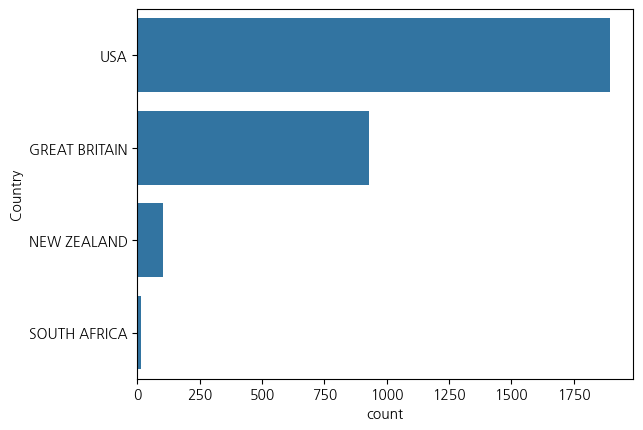

In [26]:
# countplot을 쓰면 알아서 value_counts를 해줌
sns.countplot(aerial['Country'])
plt.show()

### 공습 타켓 국가

In [27]:
aerial['Target Country'].value_counts()[:10]

Target Country
ITALY      1114
BURMA       335
LIBYA       272
GREECE      228
TUNISIA     113
EGYPT        80
JAPAN        71
CHINA        52
SICILY       46
GERMANY      42
Name: count, dtype: int64

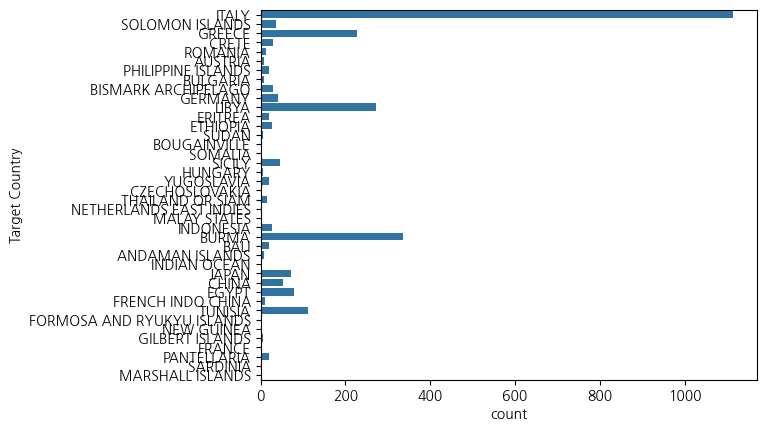

In [28]:
sns.countplot(aerial['Target Country'])
plt.show()

burma 근처에 있는 BINDUKURL 관측소의 온도만 추출

In [29]:
weather_station_location.head(2)

,WBAN,NAME,STATE/COUNTRY ID,Latitude,Longitude
0,33013,AIN EL,AL,36.383333,6.650000
1,33031,LA SENIA,AL,35.616667,0.583333


In [30]:
weather_station_location_id = weather_station_location[weather_station_location['NAME'] == 'BINDUKURI']['WBAN']
weather_station_location_id

70    32907
Name: WBAN, dtype: int64

In [31]:
weather_bin = weather[weather['STA'] == weather_station_location_id.values[0]]
weather_bin

,STA,Date,MeanTemp
78252,32907,1943-5-11,28.888889
78253,32907,1943-5-12,25.555556
78254,32907,1943-5-13,24.444444
78255,32907,1943-5-14,23.888889
78256,32907,1943-5-15,27.777778
...,...,...,...
78998,32907,1945-5-27,23.333333
78999,32907,1945-5-28,25.555556
79000,32907,1945-5-29,24.444444
79001,32907,1945-5-30,25.555556


In [32]:
weather_bin['Date'] = pd.to_datetime(weather_bin['Date'])
weather_bin['Date'].dtype

C:\Users\5-04\AppData\Local\Temp\ipykernel_14432\3006943300.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dtype('<M8[ns]')

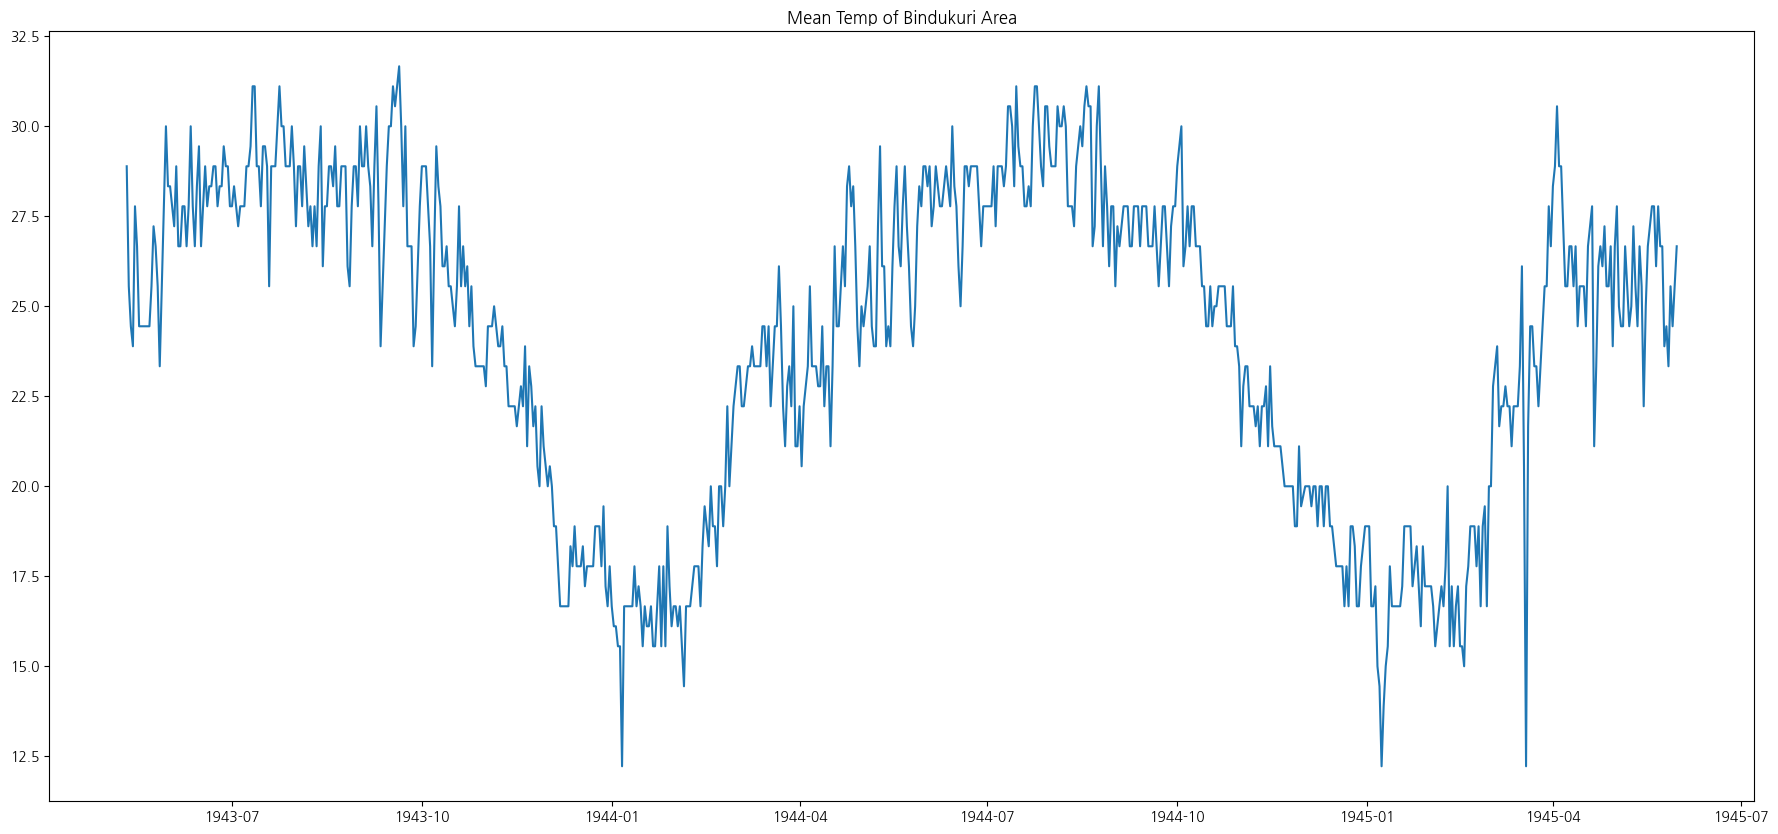

In [33]:
plt.figure(figsize=(22,10))
plt.plot(weather_bin['Date'], weather_bin['MeanTemp'])
plt.title("Mean Temp of Bindukuri Area")
plt.show()

In [34]:
operations[['month', 'day', 'year']] = operations['Mission Date'].str.split("/", n=2, expand=True)
operations

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID,month,day,year
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,8,15,1943
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,9366.0,8,15,1943
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,9.0,NaN,NaN,NaN,8,15,1943
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,7.5,NaN,NaN,NaN,8,15,1943
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,8.0,NaN,NaN,22585.0,8,15,1943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178276,178738,2/16/1945,CBI,USA,10 AF,89 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,35815.0,2,16,1945
178277,178739,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,35020.0,2,16,1945
178278,178740,2/16/1945,CBI,USA,10 AF,90 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,35022.0,2,16,1945
178279,178741,2/16/1945,PTO,NEW ZEALAND,RNZAF,NO. 22 SQUADRON RNZAF,F4U,NaN,NaN,NaN,...,NaN,NaN,8000.0,4.0,NaN,NaN,NaN,2,16,1945


In [35]:
operations = operations[(operations['year'] >= '1943') & (operations['month'] >= '8')]
operations

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID,month,day,year
0,1,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,8,15,1943
1,2,8/15/1943,PTO,USA,5 AF,400 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,20.0,NaN,NaN,9366.0,8,15,1943
2,3,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,9.0,NaN,NaN,NaN,8,15,1943
3,4,8/15/1943,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,...,NaN,NaN,NaN,7.5,NaN,NaN,NaN,8,15,1943
4,5,8/15/1943,PTO,USA,5 AF,321 BS,B24,NaN,1,NaN,...,NaN,NaN,NaN,8.0,NaN,NaN,22585.0,8,15,1943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178075,178537,8/14/1943,MTO,NaN,NaN,NaN,B25,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,95403.0,8,14,1943
178076,178538,8/14/1943,MTO,NaN,NaN,NaN,B25,NaN,NaN,NaN,...,NaN,NaN,NaN,6.0,NaN,NaN,197510.0,8,14,1943
178077,178539,8/14/1943,NaN,USA,8 AF,NaN,B25,NaN,NaN,NaN,...,NaN,NaN,NaN,17.0,NaN,NaN,197518.0,8,14,1943
178078,178540,8/14/1943,NaN,USA,8 AF,NaN,B25,NaN,NaN,NaN,...,NaN,NaN,NaN,17.0,NaN,NaN,292816.0,8,14,1943


In [36]:
operations['Mission Date'] = pd.to_datetime(operations['Mission Date'])
operations['Mission Date'].dtype

C:\Users\5-04\AppData\Local\Temp\ipykernel_14432\617502669.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



dtype('<M8[ns]')

In [37]:
aerial_war = operations[(operations['Country'] == 'USA') & (operations['Target Country'] == 'BURMA') & (operations['Target City'] == 'KATHA')]
aerial_war

,Mission ID,Mission Date,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,...,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID,month,day,year
3740,3741,1944-08-02,CBI,USA,10 AF,528 FS,P51,NaN,10,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,30767.0,8,2,1944
10023,10024,1943-09-20,CBI,USA,10 AF,490 BS,B25,NaN,1,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,30792.0,9,20,1943
10938,10939,1943-09-24,CBI,USA,10 AF,22 BS,B25,NaN,1,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,30765.0,9,24,1943
10942,10943,1943-09-24,CBI,USA,10 AF,22 BS,B25,NaN,1,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,30766.0,9,24,1943
20891,20892,1944-08-17,CBI,USA,10 AF,490 BS,B25,NaN,1.0,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,30809.0,8,17,1944
21144,21145,1944-08-18,CBI,USA,10 AF,88 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,30769.0,8,18,1944
21145,21146,1944-08-18,CBI,USA,10 AF,88 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,30770.0,8,18,1944
21147,21148,1944-08-18,CBI,USA,10 AF,88 FS,P47,NaN,10.0,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,30768.0,8,18,1944
29396,29397,1944-08-29,CBI,USA,10 AF,490 BS,B25,NaN,1.0,NaN,...,NaN,NaN,NaN,12.0,NaN,NaN,30786.0,8,29,1944
34375,34376,1944-09-06,CBI,USA,10 AF,490 BS,B25,NaN,1.0,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,30813.0,9,6,1944


In [38]:
liste = []
for day in aerial_war['Mission Date']:
    liste.append(weather_bin[weather_bin['Date'] == day]['MeanTemp'].values[0])
liste

[28.88888889,
 31.66666667,
 26.66666667,
 26.66666667,
 30.55555556,
 31.11111111,
 31.11111111,
 31.11111111,
 26.11111111,
 27.77777778,
 26.66666667,
 27.77777778,
 27.77777778,
 26.66666667,
 25.55555556,
 27.22222222,
 27.22222222,
 27.22222222,
 27.22222222]

In [39]:
trace = go.Scatter(
    x = weather_bin['Date'],
    mode = 'lines',
    y = weather_bin['MeanTemp'],
    marker = dict(color = 'rgba(16, 122, 2, 0.8)'),
    name = "Mean Temperature"
)

trace1 = go.Scatter(
    x = aerial_war['Mission Date'],
    mode = 'markers',
    y = liste,
    marker = dict(color = 'rgba(16, 0, 200, 1)'),
    name = "Bombing Temperature"
)

layout = dict(title = "Mean Temperature --- Bombing Dates and Mean Temperature at this Date")
data = [trace, trace1]
fig = dict(data=data, layout=layout)
iplot(fig)


In [40]:
ts = weather_bin[['Date', 'MeanTemp']]

In [41]:
ts['Date'].dtype

dtype('<M8[ns]')

In [42]:
ts = ts.set_index('Date')
ts

,MeanTemp
Date,
1943-05-11,28.888889
1943-05-12,25.555556
1943-05-13,24.444444
1943-05-14,23.888889
1943-05-15,27.777778
...,...
1945-05-27,23.333333
1945-05-28,25.555556
1945-05-29,24.444444


# 정상성 테스트 ADF TEST
* ADF 테스트(Augmented Dickey-Fuller Test)시계열 데이터가 정상성(stationary)를 가졌는지 확인하는 통계 검정
* ADF테스트의 가설
    * 귀무가설($H_0$) : 시계열 데이터는 비정상성을 띈다.
    * 대립가설($H_1$) : 시계열 데이터는 정상성을 띈다.
* ADF테스트의 결과해석
    * p-value 유의수준 0.05보다 작으면, 정상성, 높으면 비정상성
    * Test Statistic : 검정 통계량이 주어진 임계값(critical value)보다 작으면 데이터는 정상성
* ADF테스트의 주요 사용 사례
    * 시계열 예측 모델에서 데이터가 정상성을 갖는지 확인
    * 정상성이 아닌 데이터를 차분하여 정상성을 변환하는 과정에서 활용
    * 금융 데이터나 경제 데이터등에서 트렌드나 계절성을 제거하기 위한 전처리 단계로 많이 활용

In [43]:
from statsmodels.tsa.stattools import adfuller

In [44]:
# ADF 테스트 함수
def check_adf(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statustuc : ', result[0])
    print('p-value : ', result[1])
    print('Critical Values(임계값) : ', result[4])

# MA(Moving Average) 함수
def ma_func(ts, window_size):
    rolmean = ts.rolling(window=6).mean()
    plt.figure(figsize=(22,10))
    origin = plt.plot(ts, color='red', label = "Original")
    mean = plt.plot(rolmean, color='black', label='Rolling Mean')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Original and Rolling Mean')
    plt.legend()
    plt.show()
    return rolmean

ADF테스트 및 MA결과

In [45]:
check_adf(ts['MeanTemp'])

Test statustuc :  -1.4095966745887762
p-value :  0.5776668028526354
Critical Values(임계값) :  {'1%': -3.439229783394421, '5%': -2.86545894814762, '10%': -2.5688568756191392}


In [46]:
ma_func(ts)

TypeError: ma_func() missing 1 required positional argument: 'window_size'

# 차분을 통한 정상시계열 만들기
* 차분(diff) : 시계열의 차이만 계산해서 비정상상성을 정상성으로 변환
* 원값 - 이동평균(Moving Average) : 이동평균을 사용하면 추세 성분을 제거해 정상성으로 변환

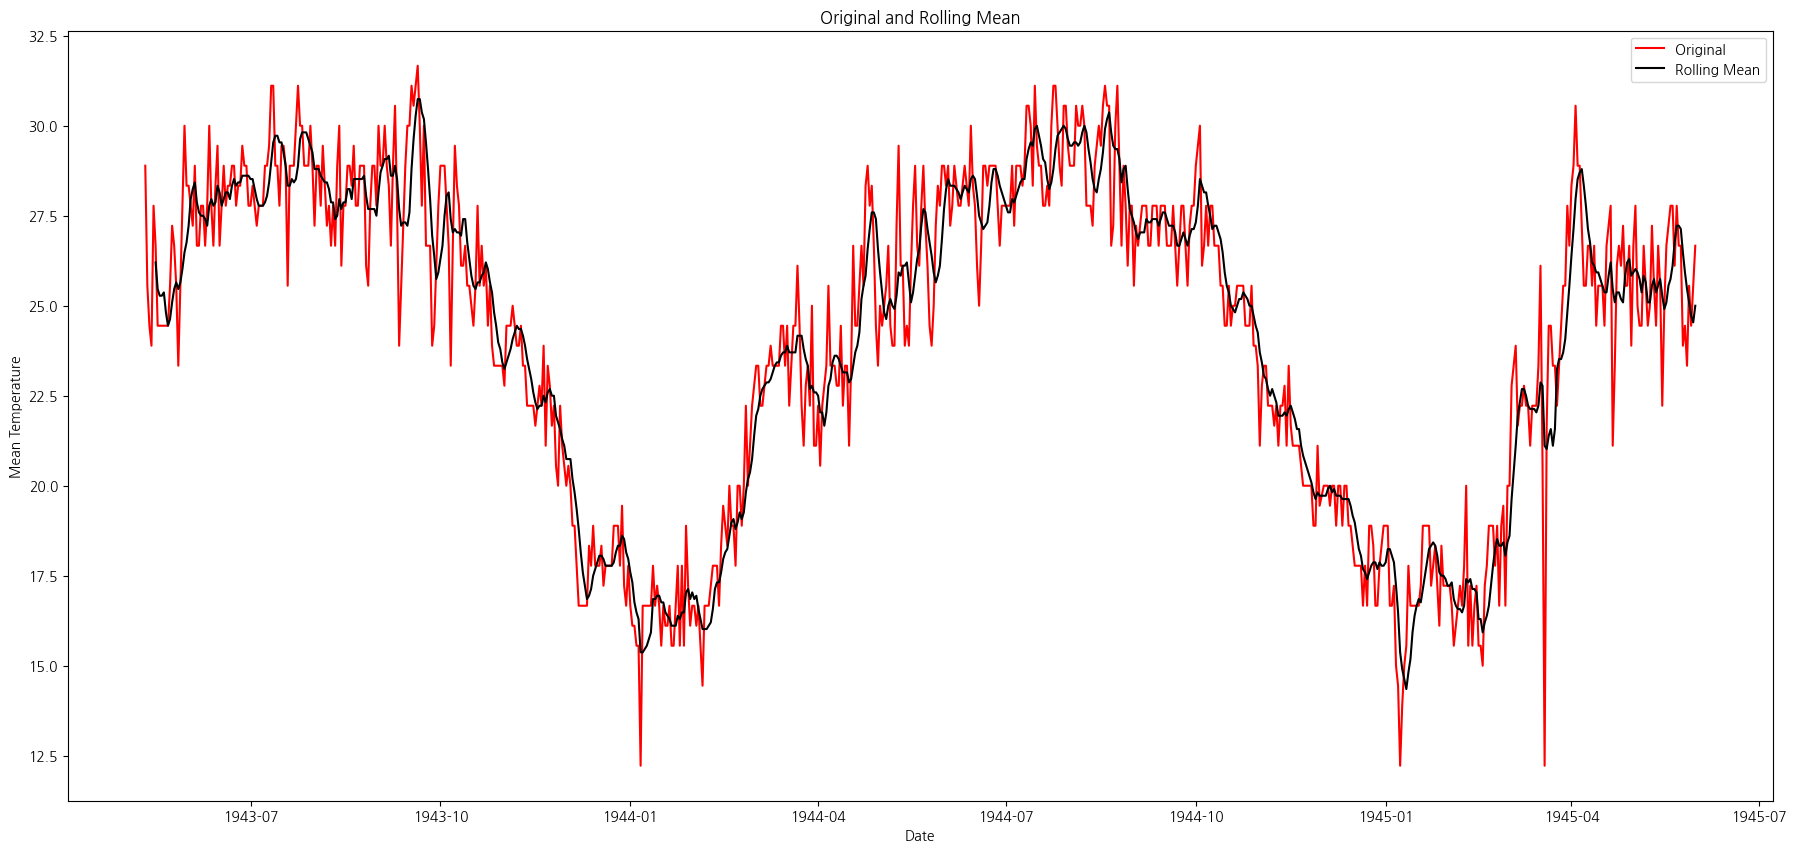

In [47]:
# Moving Average를 이용한 정상화
window_size = 6
moving_avg = ma_func(ts, window_size)

In [48]:
# 원본 데이터 - MA 값 차분 => 정상시계열로 변환
ts_ma_diff = ts - moving_avg
ts_ma_diff

,MeanTemp
Date,
1943-05-11,NaN
1943-05-12,NaN
1943-05-13,NaN
1943-05-14,NaN
1943-05-15,NaN
...,...
1945-05-27,-2.129630
1945-05-28,0.462963
1945-05-29,-0.277778


In [49]:
ts_ma_diff = ts_ma_diff.dropna()
ts_ma_diff

,MeanTemp
Date,
1943-05-16,0.462963
1943-05-17,-1.018519
1943-05-18,-0.833333
1943-05-19,-0.833333
1943-05-20,-0.925926
...,...
1945-05-27,-2.129630
1945-05-28,0.462963
1945-05-29,-0.277778


In [50]:
check_adf(ts_ma_diff)

Test statustuc :  -11.13851433513851
p-value :  3.1508685631640177e-20
Critical Values(임계값) :  {'1%': -3.4392539652094154, '5%': -2.86546960465041, '10%': -2.5688625527782327}


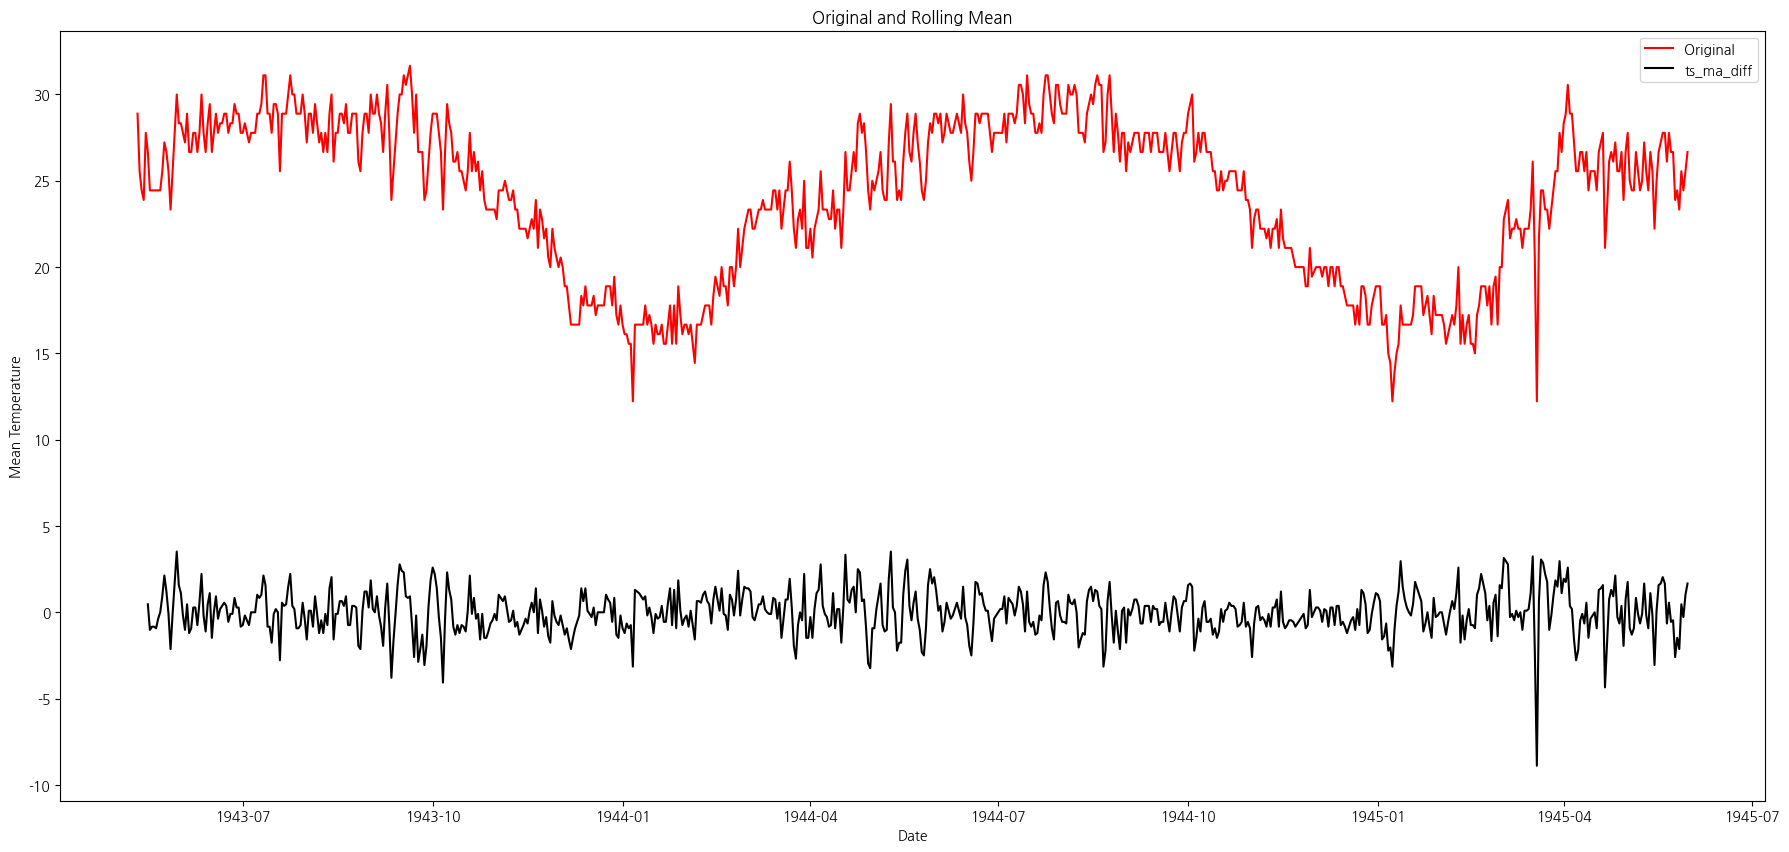

In [51]:
plt.figure(figsize=(22,10))
origin = plt.plot(ts, color='red', label = "Original")
mean = plt.plot(ts_ma_diff, color='black', label='ts_ma_diff')
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.title('Original and Rolling Mean')
plt.legend()
plt.show()


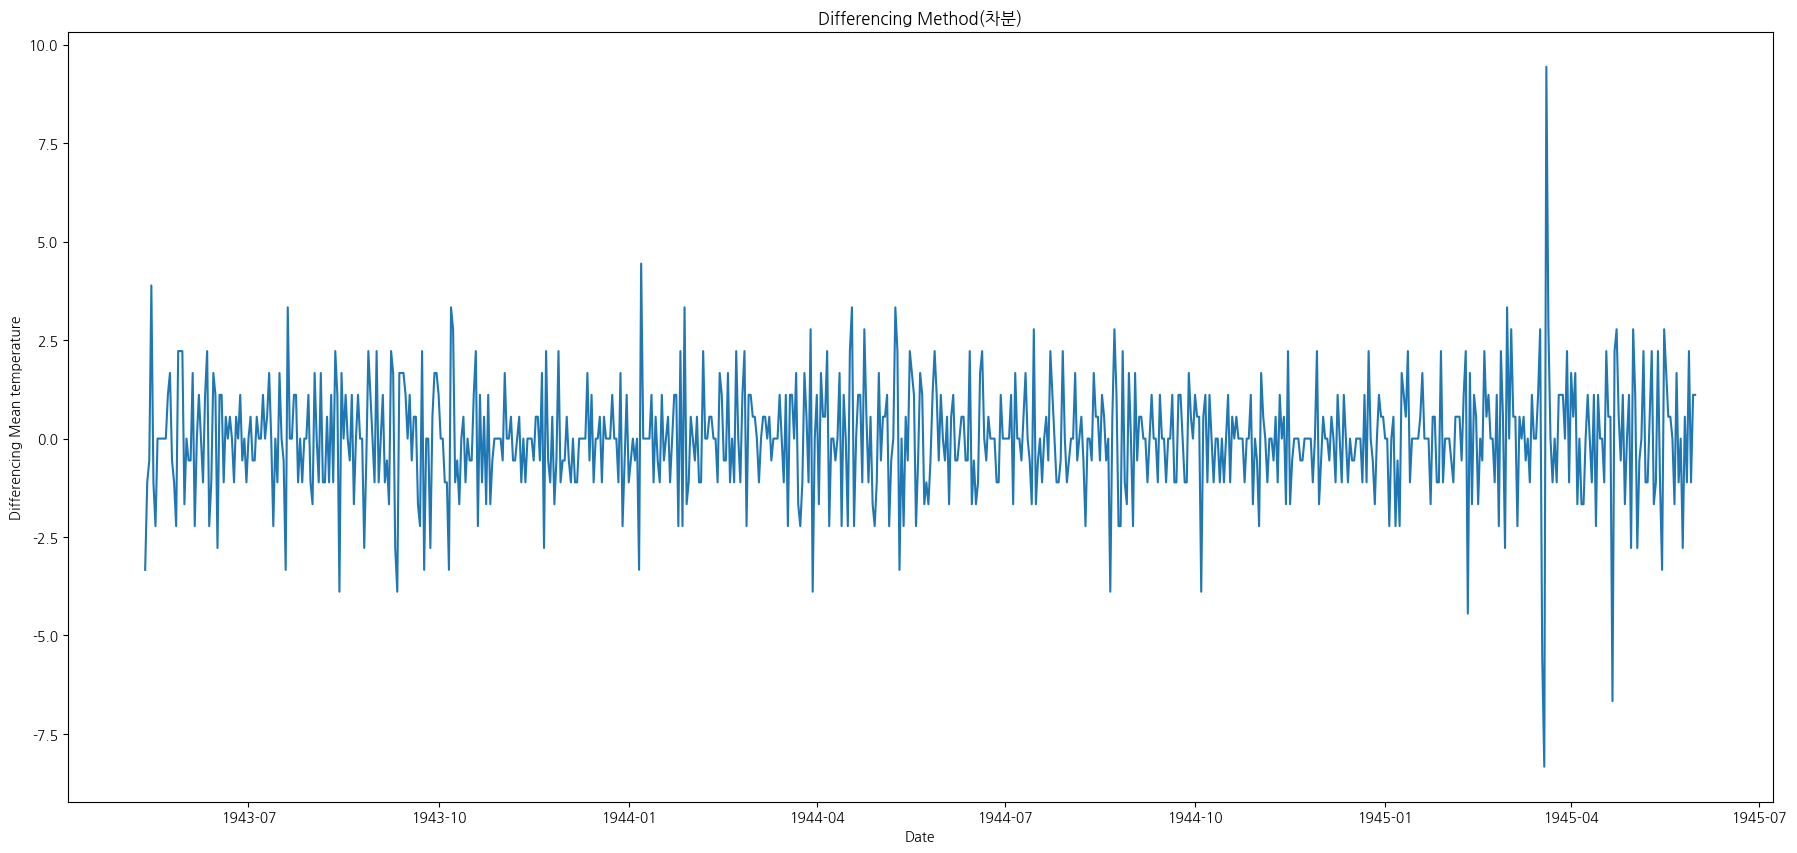

In [54]:
ts_diff = ts - ts.shift()
plt.figure(figsize=(22,10))
plt.plot(ts_diff)
plt.title("Differencing Method(차분)")
plt.xlabel('Date')
plt.ylabel('Differencing Mean temperature')
plt.show()

In [55]:
ts_diff = ts_diff.dropna()

# ARIMA 모델을 사용해서 평년 기온 예측하기
* ARIMA(p, d, q) : d차 차분한 데이터에 AR(p)모형과 MA(q)모형을 합친 모형
* ARIMA 모형에서 I는 누적(integrated)을 의미
    => 비정성 시계열을 정상 시계열로 만들기 위해서 필요한 차분의 횟수
* p, d, q 값은 ACF, PACF를 그려서 확인 

# ACF and PACF

In [56]:
from statsmodels.tsa.stattools import acf, pacf

In [57]:
lag_acf = acf(ts_diff, nlags=20)
lag_pacf = pacf(ts_diff, nlags=20, method='yw')

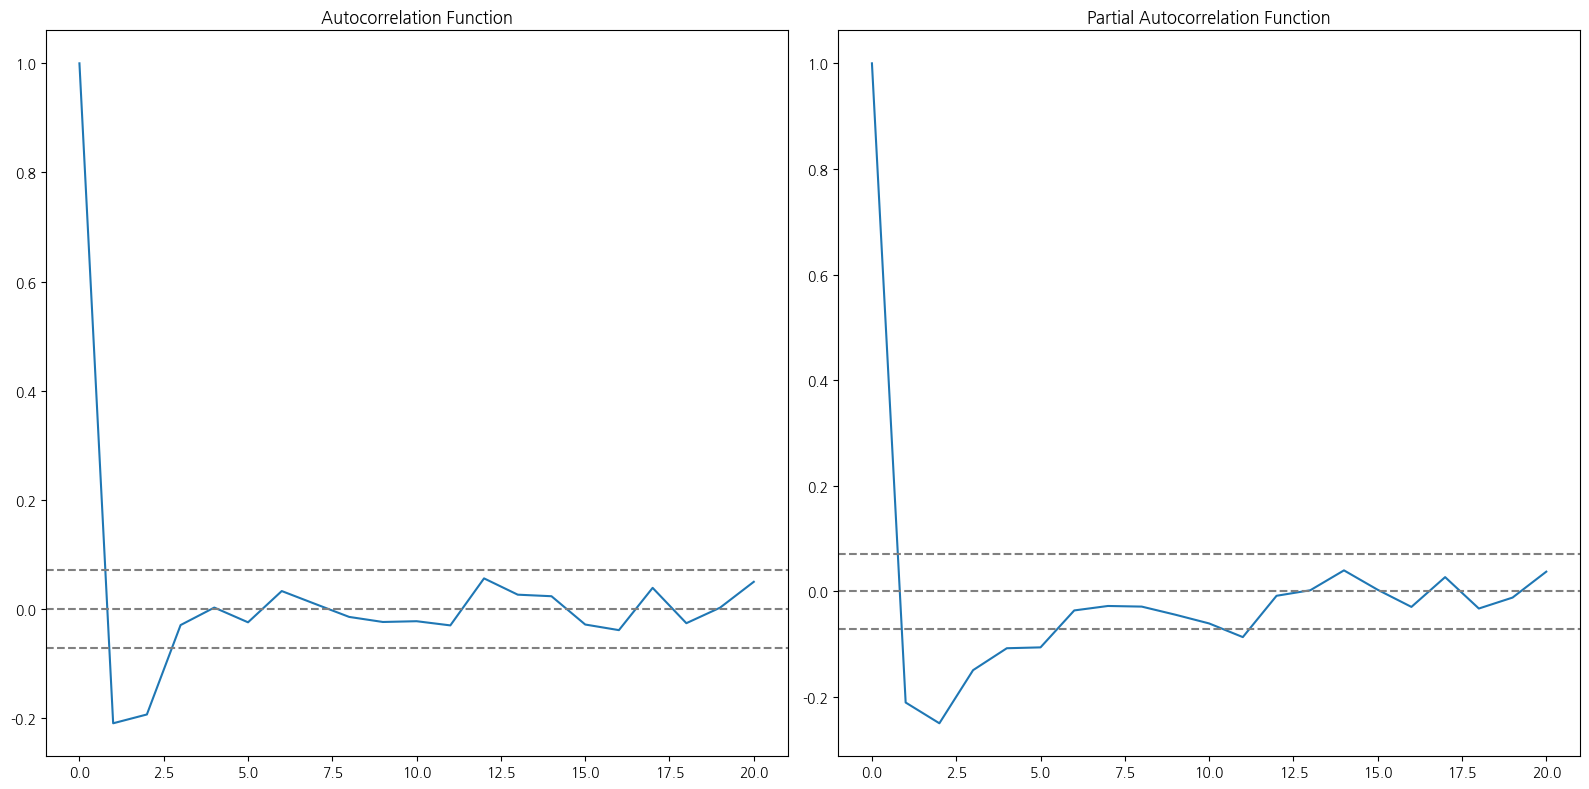

In [58]:
plt.figure(figsize=(16,8))

# Autocorrelation Function (ACF)
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)), linestyle='--', color='gray')  # 수정된 부분
plt.axhline(y=1.96/np.sqrt(len(ts_diff)), linestyle='--', color='gray')   # 수정된 부분
plt.title("Autocorrelation Function")

# Partial Autocorrelation Function (PACF)
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)), linestyle='--', color='gray')  # 수정된 부분
plt.axhline(y=1.96/np.sqrt(len(ts_diff)), linestyle='--', color='gray')   # 수정된 부분
plt.title("Partial Autocorrelation Function")

plt.tight_layout()
plt.show()


In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [60]:
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime

In [61]:
# ARIMA모델 피팅
model = ARIMA(ts, order=(1,0,1))
model_fit = model.fit()

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



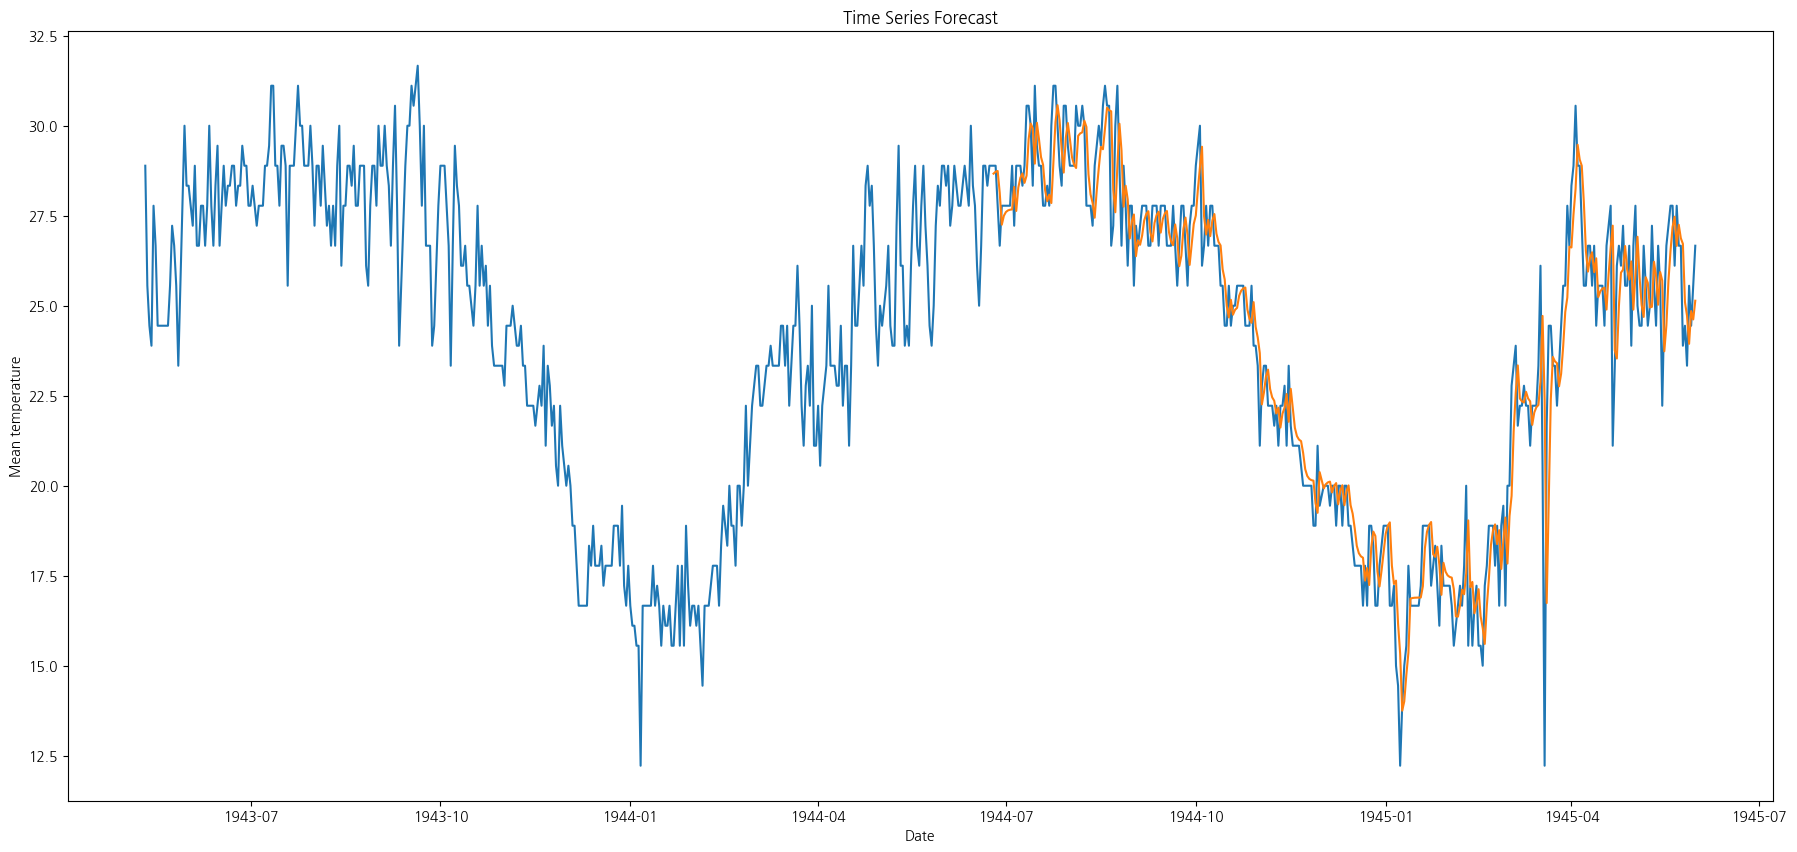

In [62]:
#predict
start_index = datetime(1944, 6, 25)
end_index = datetime(1945, 5, 31)
forecast = model_fit.predict(start=start_index, end=end_index)

#시각화
plt.figure(figsize=(22,10))
plt.plot(weather_bin['Date'], weather_bin['MeanTemp'], label = 'original')
plt.plot(forecast, label='predicted')
plt.title("Time Series Forecast")
plt.xlabel('Date')
plt.ylabel('Mean temperature')
plt.show()

# 전체 기간 예측

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



mean_squared_error 1.8625810286289943
mean_absolute_percentage_error(MAPE) 0.044217489675445074


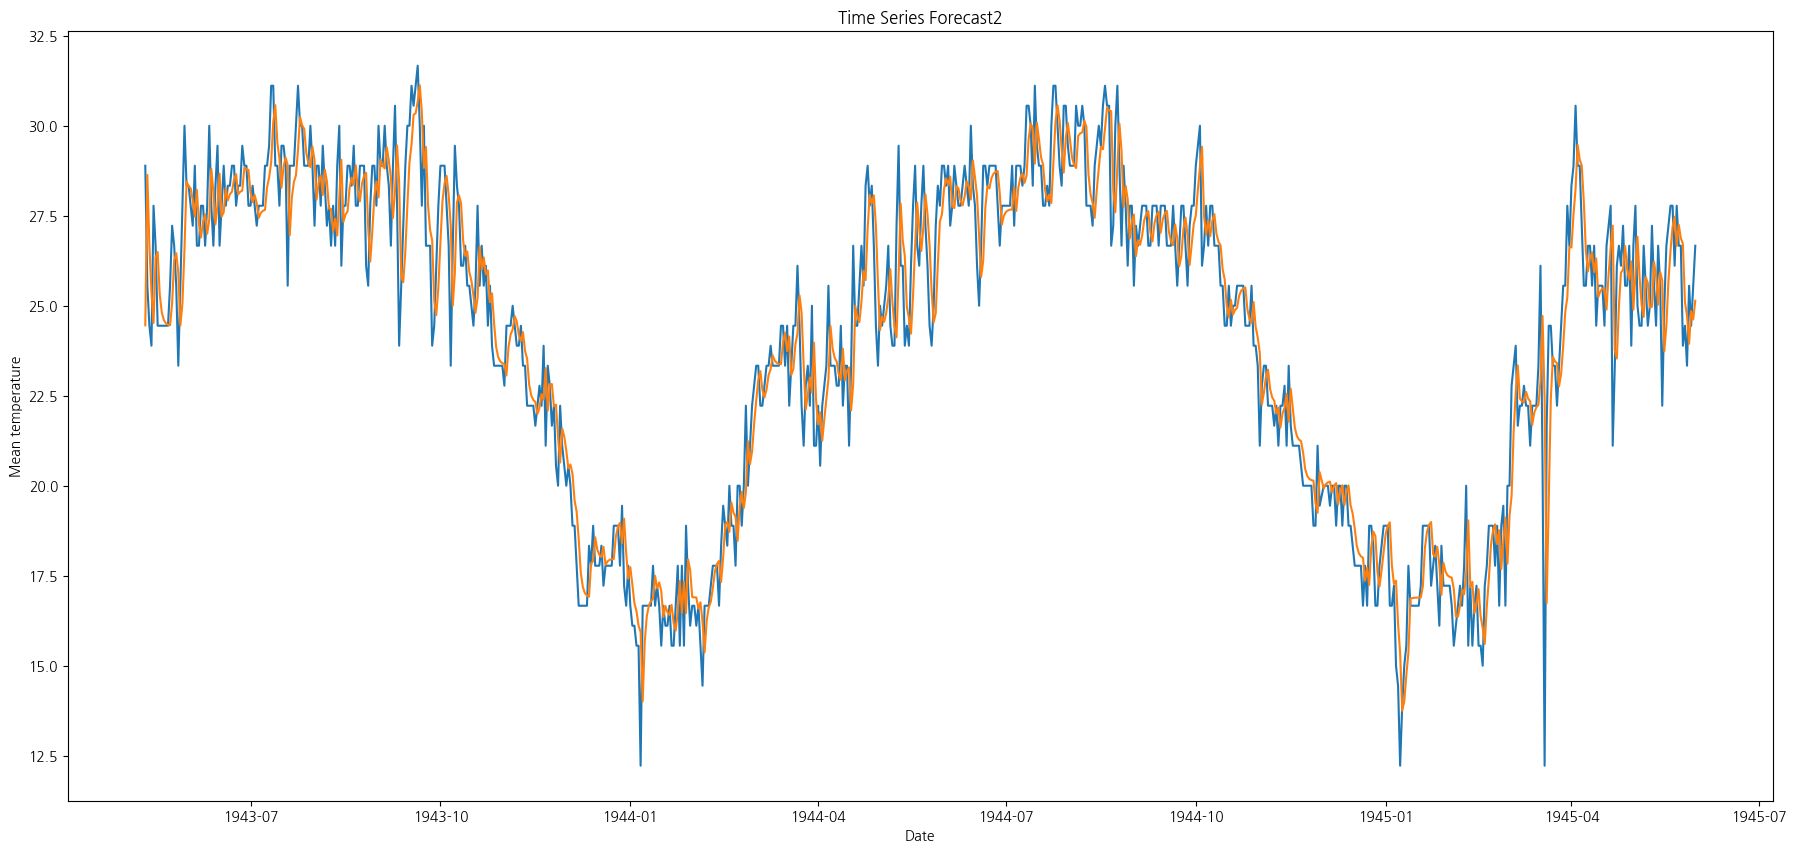

In [64]:
#predict
# ARIMA모델 피팅
model2 = ARIMA(ts, order=(1,0,1))
model_fit2 = model2.fit()
#predict
forecast2 = model_fit2.predict()

# MSE, MAPE
# 예측 오차 계산
error = mean_squared_error(ts, forecast2)
print('mean_squared_error', error)
# MAPE 계산
mape = mean_absolute_percentage_error(ts, forecast2)
print("mean_absolute_percentage_error(MAPE)", mape)


#전체 시각화
plt.figure(figsize=(22,10))
plt.plot(weather_bin['Date'], weather_bin['MeanTemp'], label = 'original')
plt.plot(forecast2, label='predicted2')
plt.title("Time Series Forecast2")
plt.xlabel('Date')
plt.ylabel('Mean temperature')
plt.show()

# 미래예측

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\5-04\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa

mean_squared_error:  1.7446082029757033
mean_absolute_percentage_error(MAPE):  0.04352562585237795


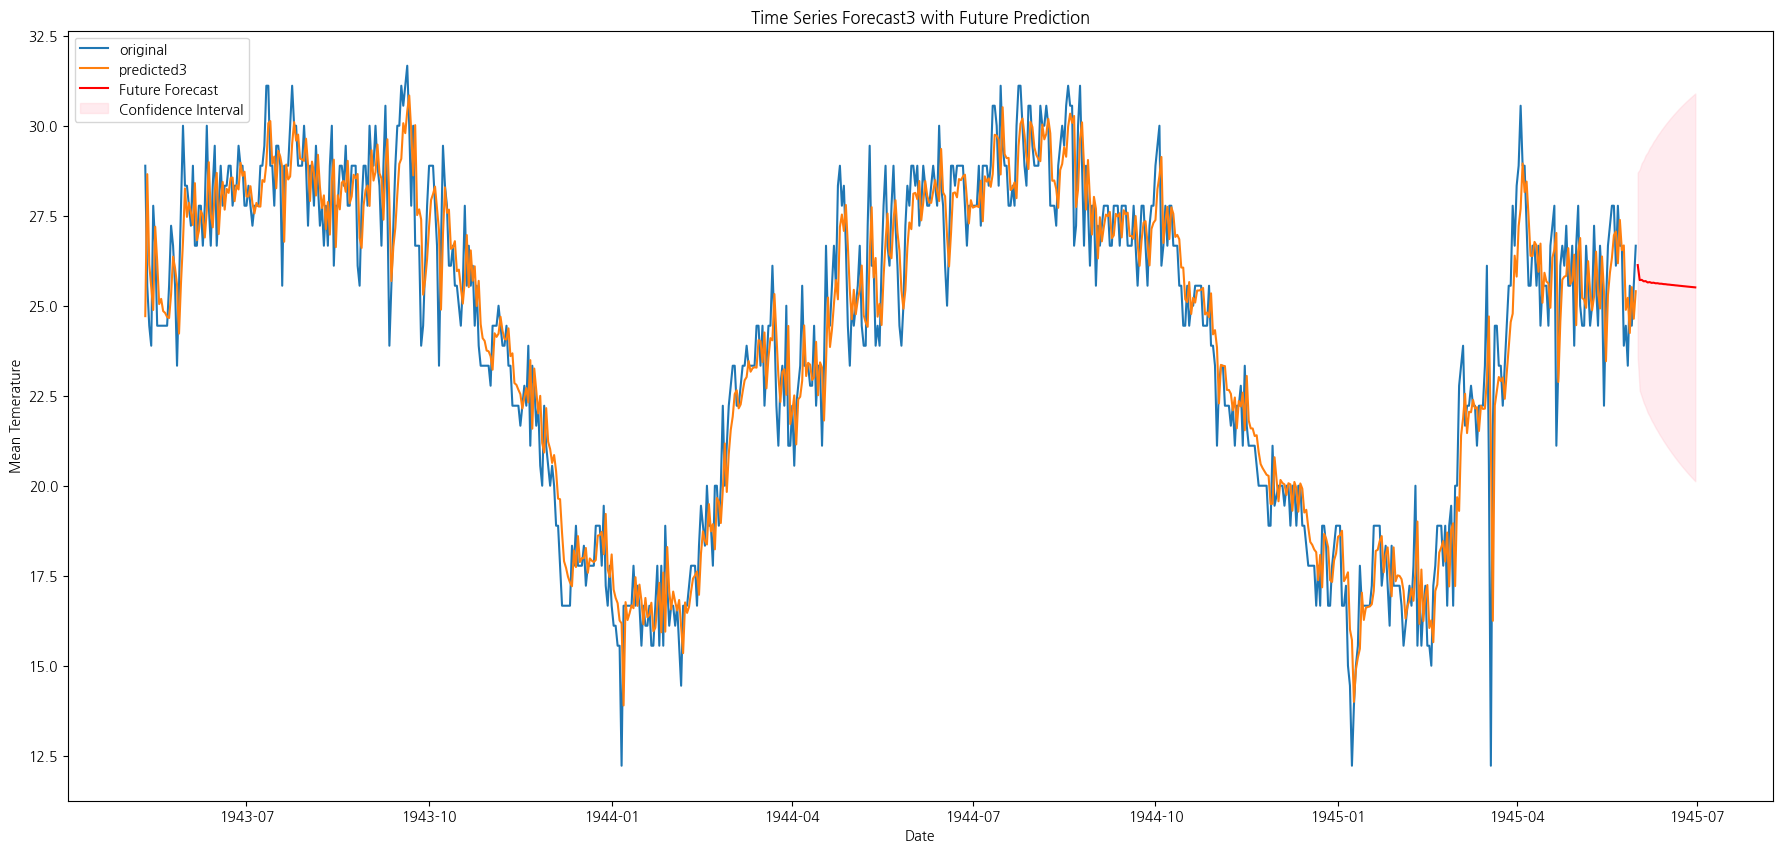

In [65]:
#ARIMA 모델 피팅
model3 = ARIMA(ts, order=(5, 0, 2))
model_fit3 = model3.fit()

#predict 미래 기간 예측 (예제 : 30일) get_forecast()
future_periods = 30 
forecast3 = model_fit3.predict()
future_forecast = model_fit3.get_forecast(steps = future_periods)

#예측값과 신뢰 구간을 분리
forecast_values = future_forecast.predicted_mean
conf_int = future_forecast.conf_int()

#MSE, MAPE
error = mean_squared_error(ts, forecast3)
print("mean_squared_error: ", error)
mape = mean_absolute_percentage_error(ts, forecast3)
print("mean_absolute_percentage_error(MAPE): ", mape)

#시각화
plt.figure(figsize=(22, 10))
plt.plot(weather_bin['Date'], weather_bin['MeanTemp'], label='original')
plt.plot(forecast3, label='predicted3')

#미래 예측 데이터 시각화
future_dates = pd.date_range(start=ts.index[-1], periods = future_periods + 1, freq = 'D')[1:] 
#예측 날짜를 데이터 프레임에 추가
plt.plot(future_dates, forecast_values, label = "Future Forecast", color = "red")

#신뢰구간 시각화
plt.fill_between(future_dates, conf_int.iloc[:, 0], conf_int.iloc[:,1], color = 'pink', alpha=0.3, label="Confidence Interval")


plt.title('Time Series Forecast3 with Future Prediction')
plt.xlabel('Date')
plt.ylabel('Mean Temerature')
plt.legend()
plt.show()